# Challenge Assignment for Week #9


<h3> Background </h3>
Coming from the mainland, you know how variable the weather can be in the summer and winter. Your investors want to ensure that there are enough customers between seasons to sustain the surf and ice cream business throughout the year.

<h3> Goal </h3>
Review the precipitation and rainfall for June and December to determine if there may be a business impact to the surf and ice cream business.

<h4>Import dependencies</h4>
(previously written snippets of code that we can then use in our code)

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

<h4>Reflect Tables into SQLAlchemy ORM</h4>

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Set up the ability to query a SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Transfer the contents of the database into a different structure of data.)
Base = automap_base()

# Reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).all()
print(results)

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [54]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
print(df)


             date  precipitation
0      2010-01-01           0.08
1      2010-01-02           0.00
2      2010-01-03           0.00
3      2010-01-04           0.00
4      2010-01-06            NaN
...           ...            ...
19545  2017-08-19           0.09
19546  2017-08-20            NaN
19547  2017-08-21           0.56
19548  2017-08-22           0.50
19549  2017-08-23           0.45

[19550 rows x 2 columns]


In [55]:
# Reviewing dataframe data types
df.dtypes


date              object
precipitation    float64
dtype: object

In [56]:
# Separate date into year, month and day
df[["year", "mm", "day"]] = df["date"].str.split("-", expand=True)
print(df)

             date  precipitation  year  mm day
0      2010-01-01           0.08  2010  01  01
1      2010-01-02           0.00  2010  01  02
2      2010-01-03           0.00  2010  01  03
3      2010-01-04           0.00  2010  01  04
4      2010-01-06            NaN  2010  01  06
...           ...            ...   ...  ..  ..
19545  2017-08-19           0.09  2017  08  19
19546  2017-08-20            NaN  2017  08  20
19547  2017-08-21           0.56  2017  08  21
19548  2017-08-22           0.50  2017  08  22
19549  2017-08-23           0.45  2017  08  23

[19550 rows x 5 columns]


In [57]:
# Perform a query to retrieve the date and temperature scores
temps = session.query(Measurement.date, Measurement.tobs).all()
print(temps)

[('2010-01-01', 65.0), ('2010-01-02', 63.0), ('2010-01-03', 74.0), ('2010-01-04', 76.0), ('2010-01-06', 73.0), ('2010-01-07', 70.0), ('2010-01-08', 64.0), ('2010-01-09', 68.0), ('2010-01-10', 73.0), ('2010-01-11', 64.0), ('2010-01-12', 61.0), ('2010-01-14', 66.0), ('2010-01-15', 65.0), ('2010-01-16', 68.0), ('2010-01-17', 64.0), ('2010-01-18', 72.0), ('2010-01-19', 66.0), ('2010-01-20', 66.0), ('2010-01-21', 69.0), ('2010-01-22', 67.0), ('2010-01-23', 67.0), ('2010-01-24', 71.0), ('2010-01-25', 67.0), ('2010-01-26', 76.0), ('2010-01-27', 68.0), ('2010-01-28', 72.0), ('2010-01-30', 70.0), ('2010-01-31', 67.0), ('2010-02-01', 66.0), ('2010-02-03', 67.0), ('2010-02-04', 69.0), ('2010-02-05', 67.0), ('2010-02-06', 67.0), ('2010-02-07', 64.0), ('2010-02-08', 69.0), ('2010-02-09', 73.0), ('2010-02-11', 73.0), ('2010-02-12', 69.0), ('2010-02-13', 69.0), ('2010-02-14', 69.0), ('2010-02-15', 71.0), ('2010-02-16', 61.0), ('2010-02-17', 69.0), ('2010-02-19', 63.0), ('2010-02-20', 64.0), ('2010-02

In [58]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temps_df = pd.DataFrame(temps, columns=['date','temperature'])
print(temps_df)

             date  temperature
0      2010-01-01         65.0
1      2010-01-02         63.0
2      2010-01-03         74.0
3      2010-01-04         76.0
4      2010-01-06         73.0
...           ...          ...
19545  2017-08-19         71.0
19546  2017-08-20         78.0
19547  2017-08-21         76.0
19548  2017-08-22         76.0
19549  2017-08-23         76.0

[19550 rows x 2 columns]


In [59]:
# Reviewing dataframe data types
temps_df.dtypes


date            object
temperature    float64
dtype: object

In [60]:
# Separate date into year, month and day
temps_df[["year", "mm", "day"]] = temps_df["date"].str.split("-", expand=True)
print(temps_df)

             date  temperature  year  mm day
0      2010-01-01         65.0  2010  01  01
1      2010-01-02         63.0  2010  01  02
2      2010-01-03         74.0  2010  01  03
3      2010-01-04         76.0  2010  01  04
4      2010-01-06         73.0  2010  01  06
...           ...          ...   ...  ..  ..
19545  2017-08-19         71.0  2017  08  19
19546  2017-08-20         78.0  2017  08  20
19547  2017-08-21         76.0  2017  08  21
19548  2017-08-22         76.0  2017  08  22
19549  2017-08-23         76.0  2017  08  23

[19550 rows x 5 columns]


<h4> Objective 1: Determine Key Statistical Data about the month of June

In [30]:
# Create dataframe specifically for June Precipitation 
June_detail_df = df[df["mm"] == "06"]
June_detail_df.head(5)

,date,precipitation,year,mm,day
date,,,,,
2010-06-01,2010-06-01,0.00,2010,06,01
2010-06-02,2010-06-02,0.01,2010,06,02
2010-06-03,2010-06-03,0.00,2010,06,03
2010-06-04,2010-06-04,0.00,2010,06,04
2010-06-05,2010-06-05,0.00,2010,06,05


In [76]:
# Sum up each month of each year
June_sum_df = June_detail_df.groupby(['year']).mean()
June_sum_df.head(5)

,precipitation
year,
2010,0.042241
2011,0.240142
2012,0.097062
2013,0.144195
2014,0.124372


In [77]:
# Calculate the summary statistics for the precipitation data
June_sum_df.describe()

,precipitation
count,8.000000
mean,0.138185
std,0.062694
min,0.042241
25%,0.114265
50%,0.124766
75%,0.161224
max,0.240142


In [78]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

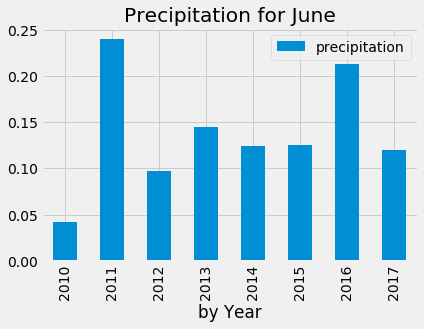

<Figure size 432x288 with 0 Axes>

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data
June_sum_df.plot.bar()
plt.title('Precipitation for June')
plt.xlabel('by Year')
plt.show()
plt.savefig('Precip_June')

In [80]:
# Create dataframe specifically for June Temperature 
Junetemp_detail_df = temps_df[temps_df["mm"] == "06"]
Junetemp_detail_df.head(5)

,date,temperature,year,mm,day
133,2010-06-01,78.0,2010,06,01
134,2010-06-02,76.0,2010,06,02
135,2010-06-03,78.0,2010,06,03
136,2010-06-04,76.0,2010,06,04
137,2010-06-05,77.0,2010,06,05


In [81]:
# Sum up each month of each year
Junetemp_mean_df = Junetemp_detail_df.groupby(['year']).mean()
Junetemp_mean_df.head(5)

,temperature
year,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907


In [65]:
# Calculate the summary statistics for the temperature data
Junetemp_mean_df.describe()

,temperature
count,8.000000
mean,74.984529
std,1.017773
min,73.938326
25%,74.449309
50%,74.957884
75%,75.064745
max,77.219895


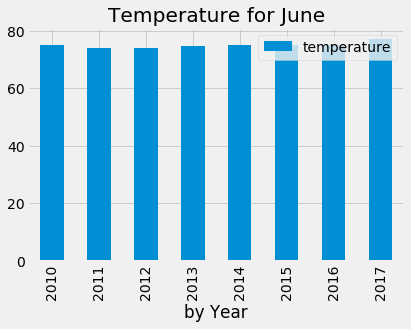

<Figure size 432x288 with 0 Axes>

In [67]:
# Use Pandas Plotting with Matplotlib to plot the data
Junetemp_mean_df.plot.bar()
plt.title('Temperature for June')
plt.xlabel('by Year')
plt.show()
plt.savefig('Temp_June')

<h4> Objective 2: Determine Key Statistical Data about the month of December

In [68]:
# Create dataframe specifically for December precipitation
Dec_detail_df = df[df["mm"] == "12"]
Dec_detail_df.head(5)

,date,precipitation,year,mm,day
305,2010-12-01,0.04,2010,12,01
306,2010-12-03,0.00,2010,12,03
307,2010-12-04,0.00,2010,12,04
308,2010-12-06,0.00,2010,12,06
309,2010-12-07,0.00,2010,12,07


In [82]:
# Sum up each month of each year
Dec_sum_df = Dec_detail_df.groupby(['year']).mean()
Dec_sum_df.head(5)

,precipitation
year,
2010,0.459087
2011,0.201581
2012,0.089604
2013,0.169014
2014,0.188439


In [83]:
# Calculate the summary statistics for the precipitation data
Dec_sum_df.describe()

,precipitation
count,7.000000
mean,0.210961
std,0.115829
min,0.089604
25%,0.169260
50%,0.188439
75%,0.200538
max,0.459087


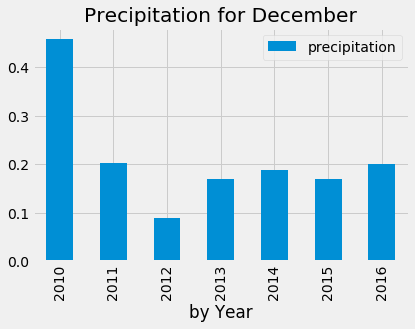

<Figure size 432x288 with 0 Axes>

In [84]:
# Use Pandas Plotting with Matplotlib to plot the data
Dec_sum_df.plot.bar()
plt.title('Precipitation for December')
plt.xlabel('by Year')
plt.show()
plt.savefig('Precip_December')

In [70]:
# Create dataframe specifically for December Temperature 
Dectemp_detail_df = temps_df[temps_df["mm"] == "12"]
Dectemp_detail_df.head(5)

,date,temperature,year,mm,day
305,2010-12-01,76.0,2010,12,01
306,2010-12-03,74.0,2010,12,03
307,2010-12-04,74.0,2010,12,04
308,2010-12-06,64.0,2010,12,06
309,2010-12-07,64.0,2010,12,07


In [71]:
# Sum up each month of each year
Dectemp_mean_df = Dectemp_detail_df.groupby(['year']).mean()
Dectemp_mean_df.head(5)

,temperature
year,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861


In [72]:
# Calculate the summary statistics for the temperature data
Dectemp_mean_df.describe()

,temperature
count,7.000000
mean,71.108858
std,1.134979
min,69.896861
25%,70.514569
50%,71.094017
75%,71.159037
max,73.423913


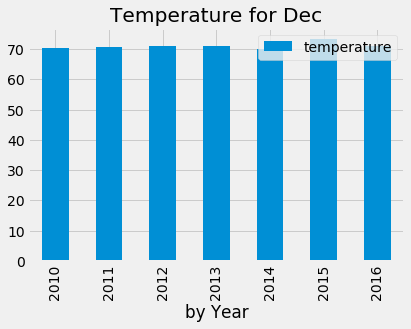

<Figure size 432x288 with 0 Axes>

In [73]:
# Use Pandas Plotting with Matplotlib to plot the data
Dectemp_mean_df.plot.bar()
plt.title('Temperature for Dec')
plt.xlabel('by Year')
plt.show()
plt.savefig('Temp_Dec')

<h4> Objective 3: Compare your findings between the month of June and December.

December clearly experiences more rain than in June (.21 on average vs .14 for June).  In fact, looking at the average by month, December gets the most rain.  Further December tends to have a lower temperature (71 degrees) than in June (74 degrees), although only by 4 degrees.  June certainly seems to be a better month in terms of precipitation and temperature.



In [85]:
# Sum up each month of each year
Month_sum_df = df.groupby(['mm']).mean()
Month_sum_df.head(5)

,precipitation
mm,
01,0.129975
02,0.137271
03,0.204227
04,0.150639
05,0.145677


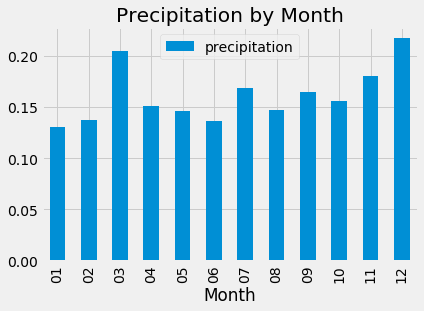

<Figure size 432x288 with 0 Axes>

In [86]:
Month_sum_df.plot.bar()
plt.title('Precipitation by Month')
plt.xlabel('Month')
plt.show()
plt.savefig('Precip_Month')

In [87]:
# Create dataframe specifically for Temperature by Mo
Motemp_detail_df = temps_df.groupby(['mm']).mean()
Motemp_detail_df.head(5)

,temperature
mm,
01,68.726115
02,69.442236
03,70.059067
04,72.357268
05,73.680900


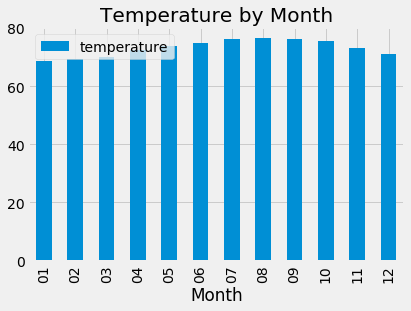

<Figure size 432x288 with 0 Axes>

In [88]:
Motemp_detail_df.plot.bar()
plt.title('Temperature by Month')
plt.xlabel('Month')
plt.show()
plt.savefig('Temp_Month')

<h4> Objective 4: Make 2 or 3 recommendations for further analysis</h4>
While rain may have some impact on surfing, one has to question and understand consumers behavior in the rain.  I would argue that most consumers do not let the rain affect them when in Hawaii because the temperature is so nice.  Thus, I would recommend that further analysis be done on consumer behavior/purchases of ice cream on each day and rentals for surf boards.  I would then look to see if changes in temperature or precipitation correlate to changes in sales of ice cream or rentals of surf boards.